# 1.Setup and Load Data

1.1.Install Dependancies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python 

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\prasa\AppData\Local\Temp\pip-install-0hi0paag\tensorflow-gpu_533d29353ff24de89594b411f790303d\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [2]:
import tensorflow as tf
import os #used to navigate through file structures

In [3]:
os.path.join('data','happy')

'data\\happy'

In [4]:
#Avoid OOM(out of memory) errors by limiting the GPU consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU') #listing the devices
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

1.2 Remove Dodgy images

In [5]:
import cv2
import imghdr #to check the file extensions

In [6]:
data_dir = 'data'

In [7]:
os.listdir(data_dir) #for listing folder under data directory

['happy', 'sad']

In [8]:
#os.listdir(os.path.join(data_dir,'happy')) #for listing all images from the happy folder

In [9]:
image_exts = ['jpg','jpeg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir): #image class for folders under directory
      for image in os.listdir(os.path.join(data_dir,image_class)): #image for all images in the folders
        print(image)

05-12-21-happy-people.jpg
10-Habits-of-Happy-People-Seniors-Today.jpg
110754-utyeqqosky-1547658396.jpeg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
1_617fd1e2590c2.jpg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
2d5e8301-images_habits-of-happy-people-cr3.jpg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
613k1XcpYCL._AC_UF8941000_QL80_.jpg
7-principles-of-successful-and-happy-people.png
7VR73K6EP5ETVEOUFANWBUYJEQ.jpg
81Vk4C.jpg
960x0.jpg
988689_Wallpaper2.jpg
9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg
afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg
A_Sep20_14_1189155141.jpg
b-and-michelle-duggar-lash-out-at-amazon-prime-docuseries-about-their-family.jpg
blog-2.jpeg
cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg
compassion-900x387.jpg
Dollarphotoclub_76084977-1.jpg
e162ccda8ce0f197f8863f327add9233.jpg
EZ6CR3HF25DRXNVESQANQ4DW2Q.jpg
FB-Shiny-H

In [11]:
import matplotlib.pyplot as plt

In [12]:
#img = cv2.imread(os.path.join(data_dir,'happy','81Vk4C.jpg'))

In [13]:
#plt.imshow(img)#to show the image but matplotlib used bgr and opencv uses rgb so changing it shows actual colours

In [14]:
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #to show actual colours
#plt.show()

In [15]:
#to remove those images which are not in proper extensions
for image_class in os.listdir(data_dir): #looping through directories -happy and sad
    for image in os.listdir(os.path.join(data_dir,image_class)): #looping through every images
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path) #to open the image 
            tip = imghdr.what(image_path) # to check the image extensions
            if tip not in image_exts:
                print('image not in exts list{}'.format(image_path))
                os.remove(image_path)
        except exception as e:
            print('issue with image{}'.format(image_path))
            #os.remove(image_path)

1.3 Load dataset

In [16]:
tf.data.Dataset #dataset api

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [17]:
import numpy as np

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data') #building data pipeline

Found 156 files belonging to 2 classes.


In [19]:
data_iterator= data.as_numpy_iterator() #access our data pipeline
data_iterator

In [20]:
batch = data_iterator.next() #images loaded as a set of numpy array

In [21]:
#Class 1 = Sad people
#Class 0 = Happy people
batch[1]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [22]:
len(batch) #two parts to the data the images and the label

2

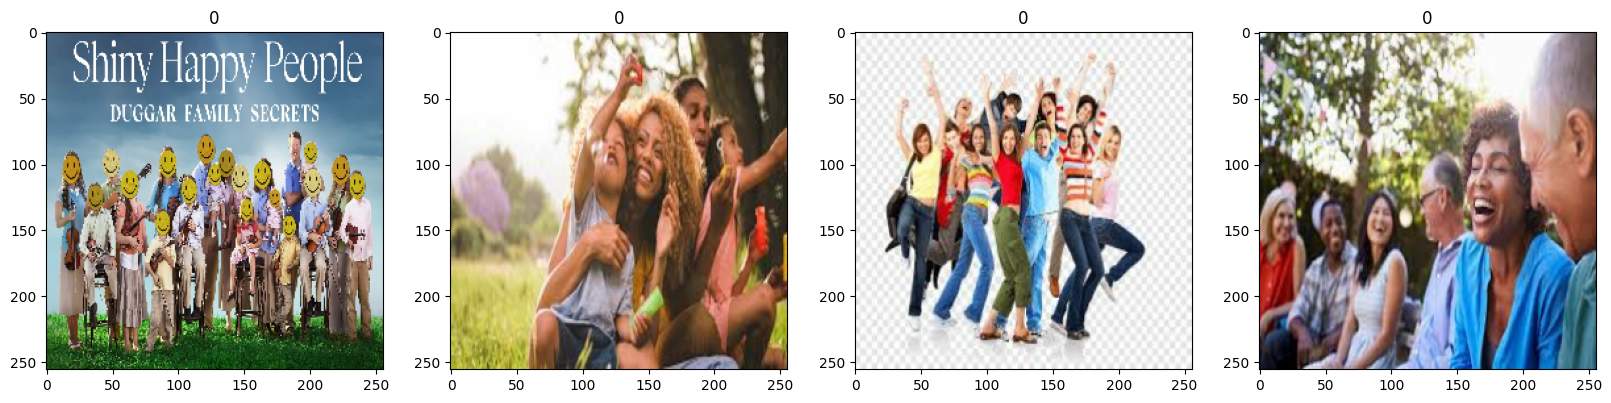

In [23]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2.Preprocess data

2.2 Scaling Data
* Scaling the image values between 0 and 1 so our model works faster 

In [24]:
data = data.map(lambda x,y: (x/255,y)) #map allows to apply a particular type of transformation on the whole data, x-images,y-labels

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()
batch[0].max()

1.0

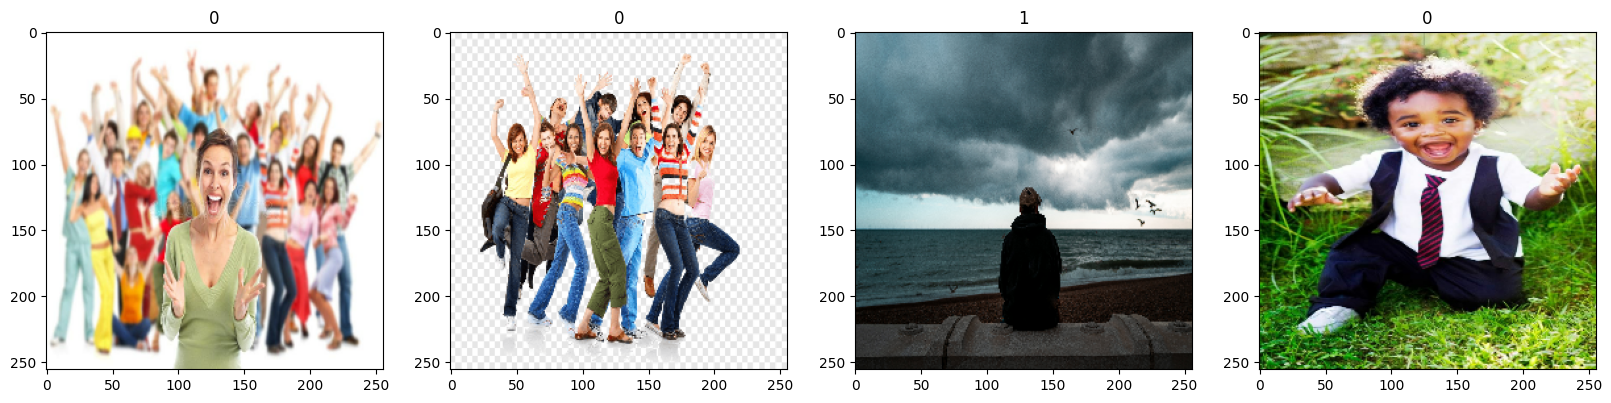

In [27]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Splitting the data

In [28]:
len(data)

5

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [30]:
val_size

1

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3 Deep model

3.1 Building deep learning model

In [32]:
from tensorflow.keras.models import Sequential #good for single input and output 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten #different layers og the neural network

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3))) #first layer should be input layer 16- filters,
                                                                          #(3,3)- 3*3 pixels, 1-stride is 1 i.e moves 1 pixel everytime
model.add(MaxPooling2D()) #halves the output,not a trainable layer

model.add(Conv2D(32,(3,3),1,activation='relu')) #relu activation - any output less than zero converted to zero and positive output taken
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

'''When we make a convulational layer filters are the last channel coz we condense the length and width
we want to condense it to a single value(dimension) by flattening it'''
model.add(Flatten())

#Fully connected layers in keras are called dense layers
model.add(Dense(256,activation='relu')) #256 values as output
model.add(Dense(1,activation='sigmoid')) #1 value as output ,Sigmoid activation - converts any value between range 0 to 1

In [35]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy']) #adam - optimizer

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train the model

In [37]:
log_dir = 'logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [40]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback]) #to train the data

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 0.7658 - accuracy: 0.5625 - val_loss: 0.9690 - val_accuracy: 0.4062
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.8207 - accuracy: 0.4375 - val_loss: 0.6631 - val_accuracy: 0.5938
Epoch 3/20
3/3 [==============================] - 3s 916ms/step - loss: 0.6495 - accuracy: 0.5521 - val_loss: 0.5515 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 3s 937ms/step - loss: 0.5949 - accuracy: 0.6250 - val_loss: 0.5662 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 3s 909ms/step - loss: 0.5510 - accuracy: 0.6771 - val_loss: 0.4799 - val_accuracy: 0.9062
Epoch 6/20
3/3 [==============================] - 3s 886ms/step - loss: 0.4514 - accuracy: 0.8854 - val_loss: 0.3757 - val_accuracy: 0.9375
Epoch 7/20
3/3 [==============================] - 3s 930ms/step - loss: 0.4083 - accuracy: 0.8333 - val_loss: 0.3912 - val_accuracy: 0.8750
Epoch 8/20
3/3 [==========

In [42]:
hist.history

{'loss': [0.7657777667045593,
  0.8207371234893799,
  0.649467945098877,
  0.5948963761329651,
  0.5510439276695251,
  0.4514346420764923,
  0.40830114483833313,
  0.3415490686893463,
  0.25834178924560547,
  0.3181277811527252,
  0.1945076435804367,
  0.19218949973583221,
  0.17096079885959625,
  0.1468428522348404,
  0.12174396961927414,
  0.0786517783999443,
  0.0630866065621376,
  0.0489145927131176,
  0.03850691393017769,
  0.02343916706740856],
 'accuracy': [0.5625,
  0.4375,
  0.5520833134651184,
  0.625,
  0.6770833134651184,
  0.8854166865348816,
  0.8333333134651184,
  0.8958333134651184,
  0.9479166865348816,
  0.8229166865348816,
  0.9479166865348816,
  0.9375,
  0.9583333134651184,
  0.96875,
  0.9583333134651184,
  0.9895833134651184,
  0.9791666865348816,
  0.9895833134651184,
  1.0,
  0.9895833134651184],
 'val_loss': [0.9689925909042358,
  0.6630611419677734,
  0.5515261888504028,
  0.566153347492218,
  0.4798826575279236,
  0.3756926953792572,
  0.3911754786968231,
  

3.3 Plot the performance

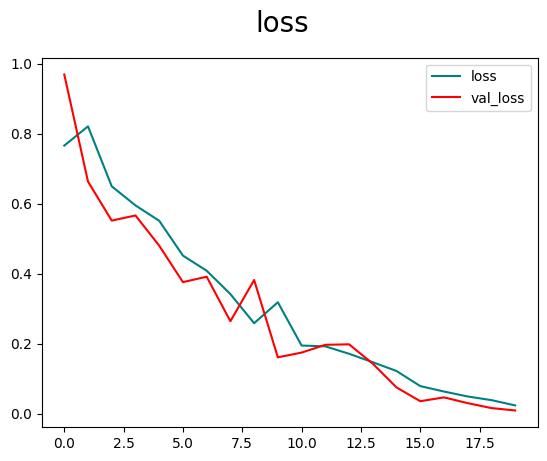

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'],color = 'red', label='val_loss')
plt.suptitle('loss',fontsize=20)
plt.legend(loc = 'upper right')
plt.show()

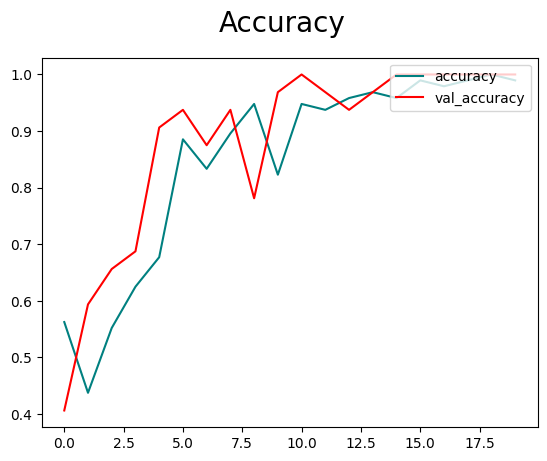

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'red', label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc = 'upper right')
plt.show()

# 4. Evaluate Performance

4.1 Evaluate

In [48]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [49]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 292ms/step


In [54]:
print(f'Precision:{precision.result().numpy()},Recall:{recall.result().numpy()},Accuracy:{accuracy.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


4.2 Test

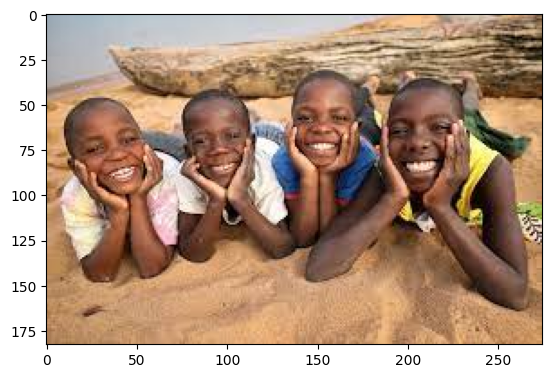

In [105]:
img = cv2.imread('happy_test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

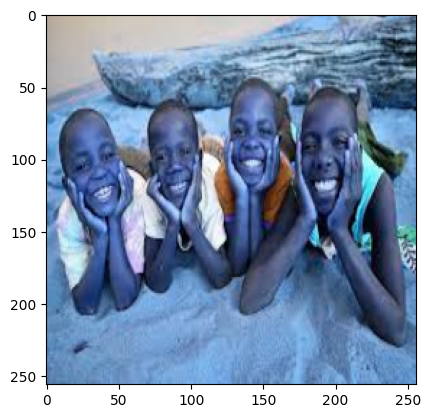

In [106]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
ypred = model.predict(np.expand_dims(resize/255,0)) #expand dims puts it under one more set of array
ypred

1/1 [==============================] - 0s 32ms/step


array([[0.44579846]], dtype=float32)

In [110]:
if ypred < 0.5:
    print(f'Predicted class  is happy')
else:
    print(f'Predicted class is sad')

Predicted class  is happy


# 5.Save the model

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('models','Happy_sad_model.h5'))

In [118]:
new_model = load_model(os.path.join('models','Happy_sad_model.h5'))

In [123]:
y_pred = new_model.predict(np.expand_dims(resize/255,0))
y_pred

1/1 [==============================] - 0s 27ms/step


array([[0.44579846]], dtype=float32)

In [124]:
if ypred < 0.5:
    print(f'Predicted class  is happy')
else:
    print(f'Predicted class is sad')

Predicted class  is happy
